In [83]:
### ----------------------
# score: >0.83
# 2020 -1 - 19

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [85]:
# 
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train,test],ignore_index = True)

In [86]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [87]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

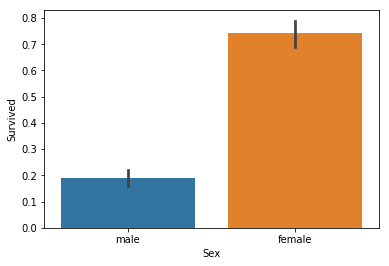

In [88]:
sns.barplot(x = 'Sex', y= 'Survived',data = train)

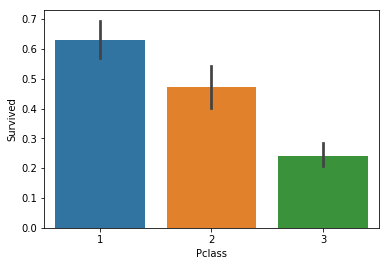

In [89]:
sns.barplot(x = 'Pclass', y= 'Survived',data = train) #　Pclass－　乘客社会等级

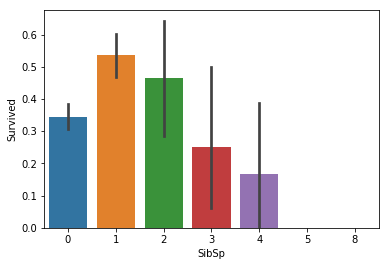

In [90]:
sns.barplot(x = 'SibSp', y= 'Survived',data = train)

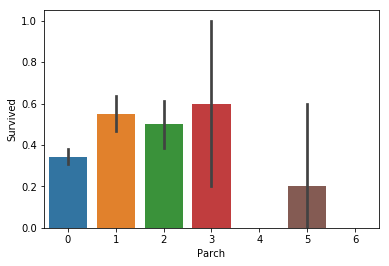

In [91]:
sns.barplot(x = 'Parch', y= 'Survived',data = train)

Text(12.359751157407416, 0.5, 'Density')

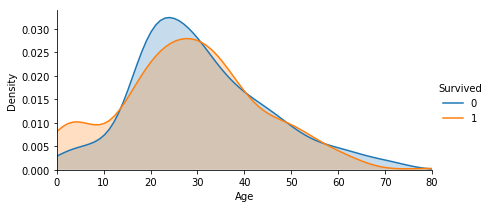

In [92]:
facet = sns.FacetGrid(train,hue = 'Survived',aspect = 2)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('Density') # 小于15岁的Survived rate 高

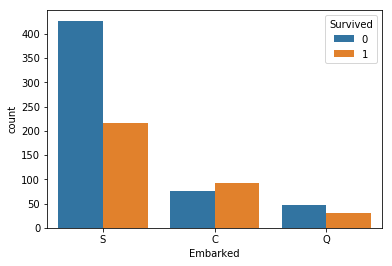

In [93]:
sns.countplot('Embarked', hue ='Survived',data = train)

In [94]:
# --------- 新增加的Title Features -----------
all_data['Title']  = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
Title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

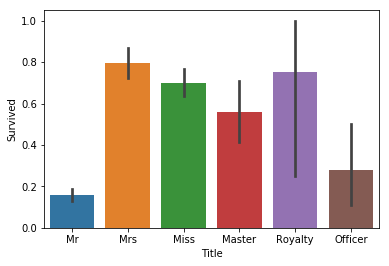

In [95]:
# Title - 分成几组后
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x = 'Title',y='Survived',data = all_data)

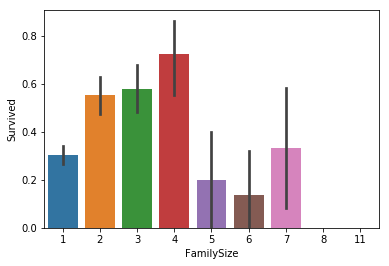

In [96]:
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1 
sns.barplot(x = 'FamilySize',y='Survived',data = all_data)

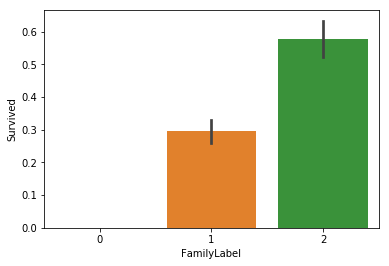

In [97]:
def Fam_label(s):
    if ((s>=2)&(s<=4)):
        return 2
    elif ((s>4)&(s<=7))|(s ==1):
        return 1
    elif (s>7):
        return 0
all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x = 'FamilyLabel',y='Survived',data = all_data)

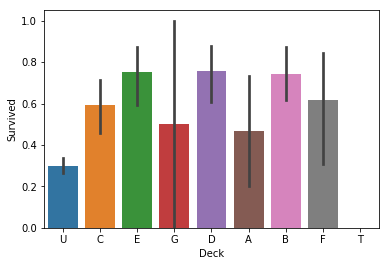

In [98]:
# Deck  - NEw 
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']  = all_data['Cabin'].str.get(0)
sns.barplot(x = 'Deck',y = 'Survived', data =  all_data)

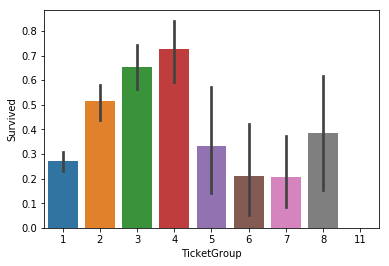

In [99]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup']  = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x = 'TicketGroup', y = 'Survived',data = all_data)

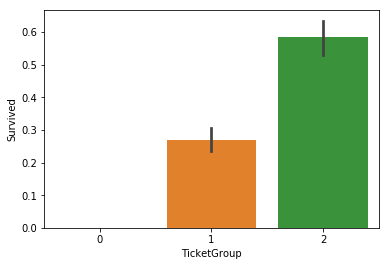

In [100]:
def Ticket_Label(s):
    if (s>=2)&(s<=4):
        return 2
    elif ((s>4)&(s<=8))|(s ==1):
        return 1
    elif (s>8):
        return 0
all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x = 'TicketGroup', y = 'Survived',data =all_data)

In [101]:
# 数据清洗 - 缺失值
from sklearn.ensemble import RandomForestRegressor
age_df    = all_data[['Age','Pclass','Sex','Title']]
age_df    = pd.get_dummies(age_df)
known_age   = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:,0]
X = known_age[:,1:]
rfr = RandomForestRegressor(random_state = 0,n_estimators = 100,n_jobs =-1)
rfr.fit(X,y)
predictions = rfr.predict(unknown_age[:,1::])
all_data.loc[(all_data.Age.isnull()),'Age'] = predictions

In [102]:
# Embarked - Data
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


In [103]:
all_data.groupby(by = ['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [104]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

In [105]:
# Fare = 
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


In [106]:
fare = all_data[(all_data['Embarked'] == 'S')&(all_data['Pclass'] ==3)].Fare.median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

In [107]:
# 同组识别
all_data['Surname'] = all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group = all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12)|(all_data['Sex'] =='female'))]
Male_Adult_Group   = all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex'] == 'male')]

In [108]:
Female_Child = pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())

In [109]:
Female_Child.columns = ['GroupCounts']
Female_Child

,GroupCounts
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverSurvived')

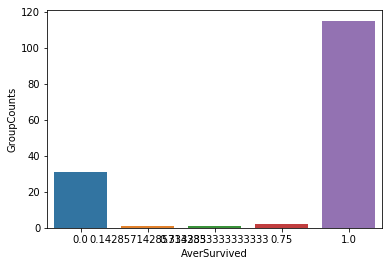

In [110]:
sns.barplot(x = Female_Child.index, y = Female_Child["GroupCounts"]).set_xlabel('AverSurvived')

In [111]:
Male_Adult = pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns = ['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [112]:
Female_Child_Group = Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_list = set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_list)

Male_Adult_List = Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_list  = set(Male_Adult_List[Male_Adult_List.apply(lambda x:x ==1)].index)
print('Survived_list = ',Survived_list)

{'Attalah', 'Danbom', 'Olsson', 'Arnold-Franchi', 'Lobb', 'Jussila', 'Lahtinen', 'Boulos', 'Robins', 'Skoog', 'Ford', 'Panula', 'Rosblom', 'Goodwin', 'Cacic', 'Strom', 'Ilmakangas', 'Canavan', 'Lefebre', 'Van Impe', 'Bourke', 'Johnston', 'Sage', 'Oreskovic', 'Rice', 'Barbara', 'Palsson', 'Vander Planke', 'Turpin', 'Caram', 'Zabour'}
Survived_list =  {'Chambers', 'Beane', 'Harder', 'McCoy', 'Frauenthal', 'Daly', 'Cardeza', 'Bishop', 'Greenfield', 'Goldenberg', 'Kimball', 'Bradley', 'Dick', 'Taylor', 'Frolicher-Stehli', 'Duff Gordon', 'Beckwith', 'Jonsson', 'Jussila', 'Nakid'}


In [114]:
# 对测试test 中的Age,Title,Sex 进行惩罚修改
train = all_data.loc[all_data['Survived'].notnull()]
test  = all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_list)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_list)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_list)),'Title'] = 'Mr'

test.loc[(test['Surname'].apply(lambda x:x in Survived_list)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_list)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_list)),'Title'] = 'Miss'

In [115]:
# 特征转换 - 
all_data = pd.concat([train,test])
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data = pd.get_dummies(all_data)

train = all_data[all_data['Survived'].notnull()]
test  = all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.as_matrix()[:,1:]
y = train.as_matrix()[:,0]

In [117]:
# model 参数优化
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

In [118]:
pipe = Pipeline([('select',SelectKBest(k =20)),
                ('classify',RandomForestClassifier(random_state =10,max_features = 'sqrt'))])

param_grid = {'classify__n_estimators':list(range(20,50,2)),
             'classify__max_depth':list(range(3,60,2))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_grid, scoring = 'roc_auc',cv =10)
gsearch.fit(X,y)
print (gsearch.best_params_,gsearch.best_score_)

{'classify__max_depth': 5, 'classify__n_estimators': 20} 0.8813872902696431


In [119]:
# training model
from sklearn.pipeline import make_pipeline
select = SelectKBest(k =20)
clf = RandomForestClassifier(random_state =10,warm_start = True,
                            n_estimators = 26,
                            max_depth =6,
                            max_features = 'sqrt')
pipelines = make_pipeline(select,clf)
pipelines.fit(X,y)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x000002121959AF28>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=6, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=26, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, war

In [123]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(pipelines,X,y,cv =10)
print('CV score:  Mean - %0.7g | Std - %.7g'%(np.mean(cv_score),np.std(cv_score)))

CV score:  Mean - 0.8462422 | Std - 0.03623982


In [124]:
# - predictions
predictions = pipelines.predict(test)
submission  = pd.DataFrame({'PassengerId':PassengerId,
                           'Survived':predictions.astype(np.int32)})
submission.to_csv('submission20200119.csv',index = False)

In [125]:
1 - 86/418

0.7942583732057417